In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cross_validation, metrics
from sklearn.naive_bayes import GaussianNB

d:\programfiles\python35\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# label

In [2]:
labels = {'0':'file', '1':'network', '2':'service', '3':'database', '4':'communication', '5':'memory', '6':'driver', 
    '7':'system', '8':'application', '9':'io', '10':'others', '11':'security', '12':'disk', '13':'processor'}

fault_label = {'0':'file', '1':'network', '2':'service', '3':'database','5':'memory', 
               '10':'others', '11':'security', '12':'disk', '13':'processor'}

# load data

In [3]:
train_X, test_X = [],[]
train_y, test_y = [],[]

print("loading data...")

try:
    with open("data_msg_type/semantic_train_x.txt", 'rU') as f:
        res = list(f)
        for line in res:
            line.strip("\n")
            features = line.split("\t")
            while features.__contains__(""):
                features.remove("")
            for i in range(len(features)):
                features[i] = float(features[i])
            train_X.append(features)
         
    #read the classes from file and put them in list.      
    with open("data_msg_type/semantic_train_y.txt", 'rU') as f:
        res = list(f)
        for line in res:
            train_y.append(int(line.strip("\n")[0]))         
except:
    print("Error in reading the train set file.")
    exit()
    
try:
    with open("data_msg_type/semantic_test_x.txt", 'rU') as f:
        res = list(f)
        for line in res:
            line.strip("\n")
            features = line.split("\t")
            while features.__contains__(""):
                features.remove("")
            for i in range(len(features)):
                features[i] = float(features[i])
            test_X.append(features)
         
    #read the classes from file and put them in list.      
    with open("data_msg_type/semantic_test_y.txt", 'rU') as f:
        res = list(f)
        for line in res:
            test_y.append(int(line.strip("\n")[0]))         
except:
    print("Error in reading the train set file.")
    exit()

print("Dataset loaded.")

loading data...


d:\programfiles\python35\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 'U' mode is deprecated
  import sys
d:\programfiles\python35\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: 'U' mode is deprecated
d:\programfiles\python35\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: 'U' mode is deprecated


Dataset loaded.


d:\programfiles\python35\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: 'U' mode is deprecated


# convert data

In [4]:
X_train = np.array(train_X) #change to matrix
y_train = np.array(train_y) #change to matrix
X_test = np.array(test_X) #change to matrix
y_test = np.array(test_y) #change to matrix

# naive bayes train

In [8]:
print("---------------naive bayes---------------")

nb_clf = GaussianNB(priors=None)
scores = cross_validation.cross_val_score(nb_clf, X_train, y_train, scoring="accuracy", cv=14)

---------------naive bayes---------------


d:\programfiles\python35\lib\site-packages\sklearn\cross_validation.py:552: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=14.
  % (min_labels, self.n_folds)), Warning)


# test and predict

In [10]:
nb_clf = nb_clf.fit(X_train, y_train)

nb_clf_test_score = nb_clf.score(X_test, y_test)

# save trained model for future use.
#joblib.dump(rf_clf,'data/rf_clf.pkl', compress=9)

count1 = 0
count2 = 0
actualist = []
predlist = []

for i in range(len(X_test)):
    count2 += 1
    classinrow = X_test[i]
    classinrow = np.array(X_test[i]).reshape(1,-1)
    # each xval is a set of features la one sample.
    # predict class for each row.. each i is a row.
    predicted = nb_clf.predict(classinrow)
    actual = y_test[i]
    actualist.append(actual)
    predlist.append(predicted[0])
    if predicted == actual:
        count1 += 1

print("Results: ", scores)
print("Test set accuracy: ", nb_clf_test_score)
print("Total cases: ", count2)
print("Correct Prediction: ", count1)
print("Correct prediction rate: ", float(count1) / count2)

Results:  [ 0.70689052  0.72612802  0.79797096  0.79674655  0.80014001  0.76758838
  0.76968848  0.77651383  0.76999825  0.77262384  0.78732715  0.79954482
  0.8142507   0.82630012]
Test set accuracy:  0.89075
Total cases:  20000
Correct Prediction:  17815
Correct prediction rate:  0.89075


# plot

             precision    recall  f1-score   support

   security       0.00      0.00      0.00       473
       file       0.88      0.26      0.40       911
    network       0.25      1.00      0.40       213
     memory       1.00      1.00      1.00         2
       disk       0.93      0.94      0.94      2891
   database       0.25      0.05      0.09       348
  processor       0.95      1.00      0.98     14495
    service       0.01      0.00      0.01       535
     others       0.30      1.00      0.46       132

avg / total       0.87      0.89      0.87     20000

[[    0    11    10     0   146     3    51    28   224]
 [    0   238   246     0    27    37   259    54    50]
 [    0     0   213     0     0     0     0     0     0]
 [    0     0     0     2     0     0     0     0     0]
 [   10     0    10     0  2724     0    38   105     4]
 [    0    14    35     0     2    18   278     0     1]
 [    0     7     0     0     0     0 14486     0     2]
 [    4     1  

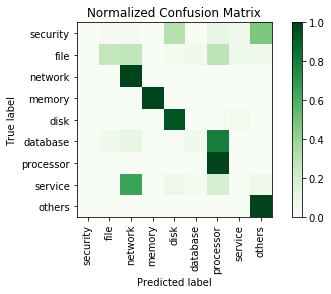

In [11]:
# cmap can be changed to many colors, (colormaps.Oranges,OrRd, etc)
def plot_CM(cm, title="Normalized Confusion Matrix", cmap=plt.cm.Greens):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(fault_label))
    plt.xticks(tick_marks, fault_label.values(), rotation=90)
    plt.yticks(tick_marks, fault_label.values())
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

print(metrics.classification_report(
    actualist, predlist, target_names = list(fault_label.values())))
cm = metrics.confusion_matrix(actualist, predlist)
print(cm)

# show a normalized matrix as a separate figure.
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
plt.figure()
plot_CM(cm_normalized)

precision: 0.8748
recall: 0.8907
f1-score: 0.8760